In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data = pd.read_csv('shopping.csv')

In [3]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30/10/2020 09:58,morning,weekend
1,2,Milk,30/10/2020 10:05,morning,weekend
2,2,Milk,30/10/2020 10:05,morning,weekend
3,3,Hot chocolate,30/10/2020 10:07,morning,weekend
4,3,Butter,30/10/2020 10:07,morning,weekend


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [5]:
# Count of unique customers
data['Transaction'].nunique()

9463

In [6]:
data['Item']  = data['Item'].str.lower()

In [7]:
(data['Item'] == 'none').value_counts()

False    20507
Name: Item, dtype: int64

In [8]:
df = data.copy()

# preprocessing

In [9]:
df['date_time'] = pd.to_datetime(df['date_time'])

# Extracting date
df['date'] = df['date_time'].dt.date

# Extracting time
df['time'] = df['date_time'].dt.time

# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month.replace(
    {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
     7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
)

# Extracting hour
df['hour'] = df['date_time'].dt.hour
df['hour'] = df['hour'].replace(
    {1: '1-2', 7: '7-8', 8: '8-9', 9: '9-10', 10: '10-11', 11: '11-12', 12: '12-13',
     13: '13-14', 14: '14-15', 15: '15-16', 16: '16-17', 17: '17-18', 18: '18-19',
     19: '19-20', 20: '20-21', 21: '21-22', 22: '22-23', 23: '23-24'}
)

# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday.replace(
    {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
)

# Dropping date_time column
df.drop('date_time', axis=1, inplace=True)

In [10]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2020-10-30,09:58:00,October,9-10,Friday
1,2,milk,morning,weekend,2020-10-30,10:05:00,October,10-11,Friday
2,2,milk,morning,weekend,2020-10-30,10:05:00,October,10-11,Friday
3,3,hot chocolate,morning,weekend,2020-10-30,10:07:00,October,10-11,Friday
4,3,butter,morning,weekend,2020-10-30,10:07:00,October,10-11,Friday


# items Exploration

In [11]:
# Count of unique items
df['Item'].nunique()

92

In [12]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

### Frequently purchased goods

In [13]:
df.groupby('Item').size().sort_values(ascending=False).head(20)

Item
coffee             5471
bread              3325
tea                1435
cake               1025
butter             1005
sandwich            771
eggs                644
hot chocolate       590
cookies             540
sugar               379
yogurt              374
rice                370
juice               369
coffee sweetner     369
detergent           342
frozen pizza        327
toast               318
milk                277
tomato sauce        193
coke                185
dtype: int64

# Data Visualization

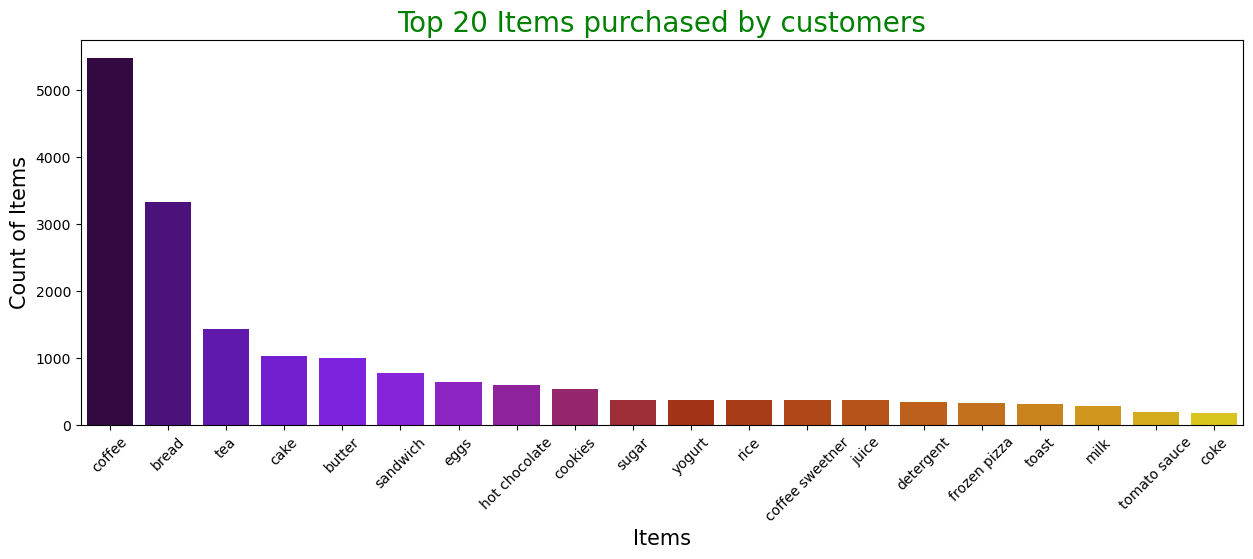

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

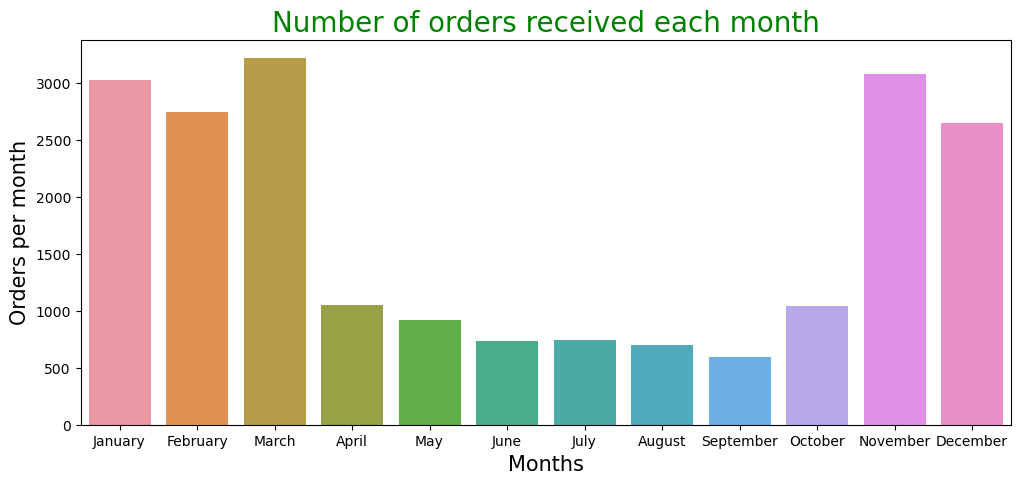

In [15]:
monthTran = df.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()


plt.show()

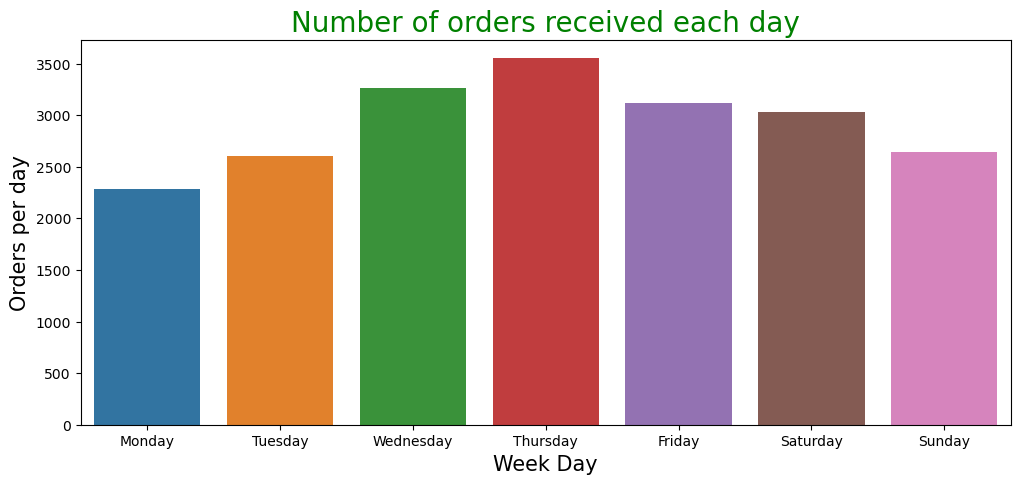

In [16]:
weekTran = df.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()

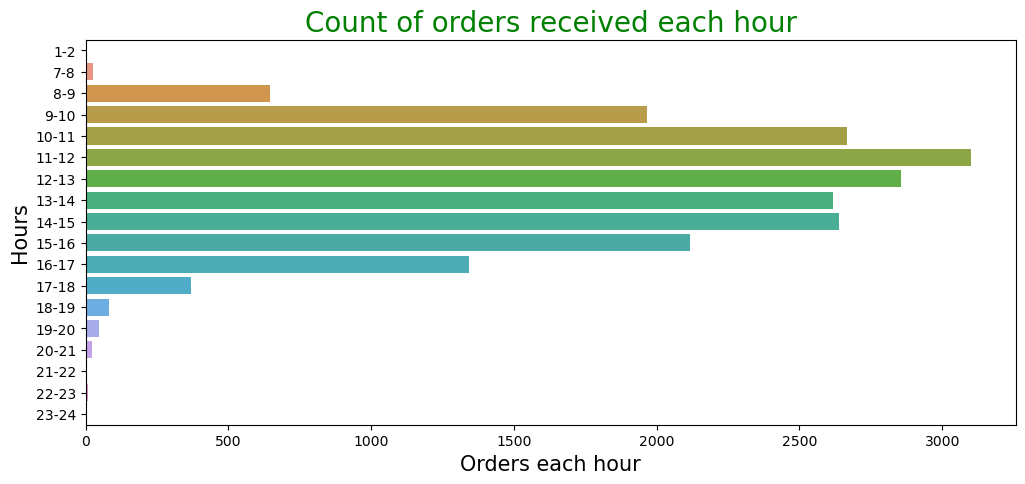

In [17]:
hourTran = df.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

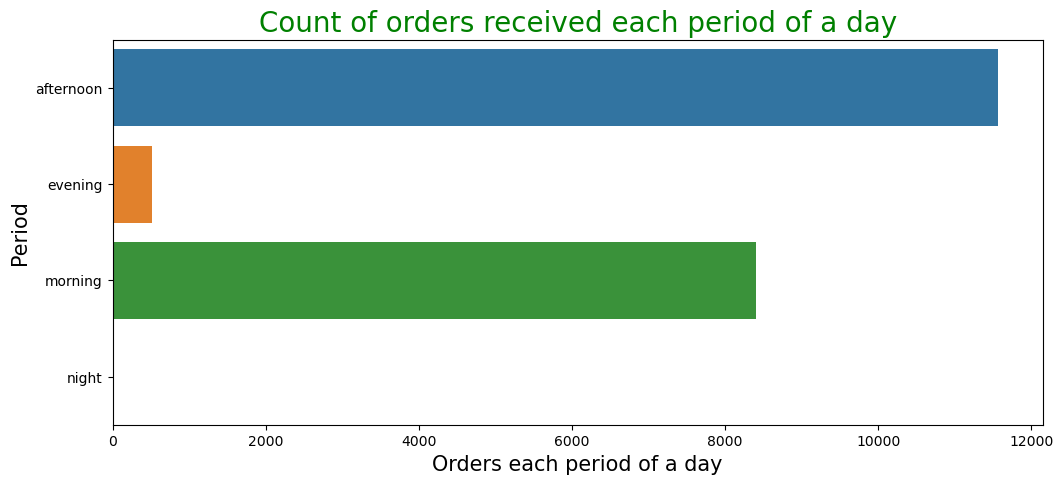

In [18]:
dayTran = df.groupby('period_day')['Transaction'].count().reset_index()
# dayTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
# dayTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

In [19]:
dates = df.groupby('date')['Transaction'].count().reset_index()
dates = dates[dates['Transaction']>=200].sort_values('date').reset_index(drop = True)

dates = pd.merge(dates, df[['date','weekday']], on = 'date', how = 'inner')
dates.drop_duplicates(inplace =True)
dates

,date,Transaction,weekday
0,2020-05-11,275,Monday
275,2020-11-19,209,Thursday
484,2020-12-11,221,Friday
705,2021-01-28,237,Thursday
942,2021-02-18,227,Thursday
1169,2021-03-25,246,Thursday
1415,2021-04-02,292,Friday
1707,2021-04-03,257,Saturday
1964,2021-08-04,205,Wednesday
2169,2021-11-03,203,Wednesday


### Understanding how the data is working 

In [20]:
combined_data= pd.DataFrame({'items': df.groupby("Transaction")["Item"].unique(),
                             'items_count': df.groupby("Transaction")["Item"].nunique()})
combined_data.reset_index(inplace=True)
combined_data.head(20)

,Transaction,items,items_count
0,1,[bread],1
1,2,[milk],1
2,3,"[hot chocolate, butter, cookies]",3
3,4,[rice],1
4,5,"[coffee, butter, bread]",3
5,6,"[eggs, butter, rice]",3
6,7,"[eggs, butter, coffee, tea]",4
7,8,"[butter, bread]",2
8,9,"[bread, rice]",2
9,10,"[milk, eggs]",2


In [21]:
df["date"].min()

datetime.date(2020, 1, 11)

In [22]:
df["date"].max()

datetime.date(2021, 12, 3)

In [23]:
df["date"].nunique()

159

# Apriori Algorithm

In [24]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
#!pip install mlxtend

# Transform Data

In [26]:
dt = df.groupby(['Transaction', 'Item'])['Item'].count()
dt.head(10)

Transaction  Item         
1            bread            1
2            milk             2
3            butter           1
             cookies          1
             hot chocolate    1
4            rice             1
5            bread            1
             butter           1
             coffee           1
6            butter           1
Name: Item, dtype: int64

In [27]:
dt = dt.unstack()
dt.head(10)

Item,adjustment,afternoon with the baker,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,...,the bart,the nomad,tiffin,toast,tomato sauce,tshirt,valentine's card,vegan feast,vegan mincepie,yogurt
Transaction,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
dt = dt.reset_index().set_index('Transaction')
dt.head(10)

Item,adjustment,afternoon with the baker,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,...,the bart,the nomad,tiffin,toast,tomato sauce,tshirt,valentine's card,vegan feast,vegan mincepie,yogurt
Transaction,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
dt =dt.fillna(0)

In [30]:
def encode_unit(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
    
dt = dt.applymap(encode_unit)

In [31]:
dt.head(10)

Item,adjustment,afternoon with the baker,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,...,the bart,the nomad,tiffin,toast,tomato sauce,tshirt,valentine's card,vegan feast,vegan mincepie,yogurt
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
frequent_items = apriori(dt, min_support =0.01, use_colnames = True)

# Applying rules to get the metrics

In [34]:
rules = association_rules(frequent_items, metric='lift', min_threshold = 1)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(butter),(bread),0.099863,0.327275,0.033605,0.336508,1.028213,0.000922,1.013916,0.030483
1,(bread),(butter),0.327275,0.099863,0.033605,0.102680,1.028213,0.000922,1.003140,0.040787
2,(breakfast cereal),(coffee),0.018176,0.478495,0.010884,0.598837,1.251501,0.002187,1.299983,0.204680
3,(coffee),(breakfast cereal),0.478495,0.018176,0.010884,0.022747,1.251501,0.002187,1.004678,0.385345
4,(butter),(coffee),0.099863,0.478495,0.051041,0.511111,1.068164,0.003257,1.066714,0.070893
5,(coffee),(butter),0.478495,0.099863,0.051041,0.106670,1.068164,0.003257,1.007620,0.122365
6,(coffee),(cake),0.478495,0.103878,0.054740,0.114399,1.101282,0.005034,1.011880,0.176350
7,(cake),(coffee),0.103878,0.478495,0.054740,0.526958,1.101282,0.005034,1.102450,0.102628
8,(hot chocolate),(cake),0.058332,0.103878,0.011413,0.195652,1.883476,0.005353,1.114097,0.498123
9,(cake),(hot chocolate),0.103878,0.058332,0.011413,0.109868,1.883476,0.005353,1.057896,0.523441


## Rules where confidence is greater than or equal to 50%

In [35]:
rules[(rules['lift']>=1) & (rules["confidence"] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(breakfast cereal),(coffee),0.018176,0.478495,0.010884,0.598837,1.251501,0.002187,1.299983,0.204680
4,(butter),(coffee),0.099863,0.478495,0.051041,0.511111,1.068164,0.003257,1.066714,0.070893
7,(cake),(coffee),0.103878,0.478495,0.054740,0.526958,1.101282,0.005034,1.102450,0.102628
12,(coffee sweetner),(coffee),0.036352,0.478495,0.019656,0.540698,1.129996,0.002261,1.135428,0.119381
14,(cookies),(coffee),0.054422,0.478495,0.028215,0.518447,1.083494,0.002174,1.082964,0.081495
17,(eggs),(coffee),0.064567,0.478495,0.035929,0.556465,1.162948,0.005034,1.175791,0.149787
19,(frozen pizza),(coffee),0.034556,0.478495,0.018070,0.522936,1.092876,0.001536,1.093154,0.088025
20,(hot chocolate),(coffee),0.058332,0.478495,0.029589,0.507246,1.060087,0.001677,1.058348,0.060192
23,(juice),(coffee),0.038571,0.478495,0.020607,0.534247,1.116514,0.002150,1.119701,0.108542
27,(sandwich),(coffee),0.071859,0.478495,0.038254,0.532353,1.112557,0.003870,1.115168,0.109002
